# Lending Club Analysis

EDA


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import zipfile

In [0]:
#zf = zipfile.ZipFile('loan.csv.zip') # having First.csv zipped file.
#loan = pd.read_csv(zf.open('loan.csv'), sep=",")
#loan.info()


In [2]:
!ls

df.pkl	gdsc2_public.csv  loan_1.pkl.gzde  sample_data


In [0]:
#from google.colab import files

#uploaded = files.upload()

In [0]:
import pandas as pd
loan = pd.read_pickle('loan_1.pkl.gzde',compression='gzip') #, 


In [5]:
loan.shape

(2260668, 145)

## Data Understanding

In [6]:
# let's look at the first few rows of the df
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Looking at all the column names
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

The **target variable**, which we want to compare across the independent variables, is loan status. The strategy is to figure out compare the average default rates across various independent variables and identify the  ones that affect default rate the most.



# Data Cleaning

Some columns have a large number of missing values, let's first fix the missing values and then check for other types of data quality problems.

In [8]:
# summarising number of missing values in each column
loan.isnull().sum()

id                                            2260668
member_id                                     2260668
loan_amnt                                           0
funded_amnt                                         0
funded_amnt_inv                                     0
term                                                0
int_rate                                            0
installment                                         0
grade                                               0
sub_grade                                           0
emp_title                                      166969
emp_length                                     146907
home_ownership                                      0
annual_inc                                          4
verification_status                                 0
issue_d                                             0
loan_status                                         0
pymnt_plan                                          0
url                         

In [9]:
loan.index

RangeIndex(start=0, stop=2260668, step=1)

In [10]:
# percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

id                                            100.0
member_id                                     100.0
loan_amnt                                       0.0
funded_amnt                                     0.0
funded_amnt_inv                                 0.0
term                                            0.0
int_rate                                        0.0
installment                                     0.0
grade                                           0.0
sub_grade                                       0.0
emp_title                                       7.0
emp_length                                      6.0
home_ownership                                  0.0
annual_inc                                      0.0
verification_status                             0.0
issue_d                                         0.0
loan_status                                     0.0
pymnt_plan                                      0.0
url                                           100.0
desc        

There are many columns which are having 100% missing data. Also, there are some with around 65% or 33% etc missing data. Missing data can cause model to behave incorrectly, so will remove that.

In [11]:
# Let's remove the columns having more than 80% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 80]
print(missing_columns)

Index(['id', 'member_id', 'url', 'desc', 'mths_since_last_record',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dty

In [12]:
Upd_loan = loan.drop(missing_columns, axis=1)
print(loan.shape)
print(Upd_loan.shape)

(2260668, 145)
(2260668, 106)


In [0]:
# summarize percentage number of missing values again

Upd_loan_Attr_Null_Perctage = (100*(Upd_loan.isnull().sum()/len(Upd_loan.index))).sort_values()

Text(0, 0.5, 'Nulls Percentage')

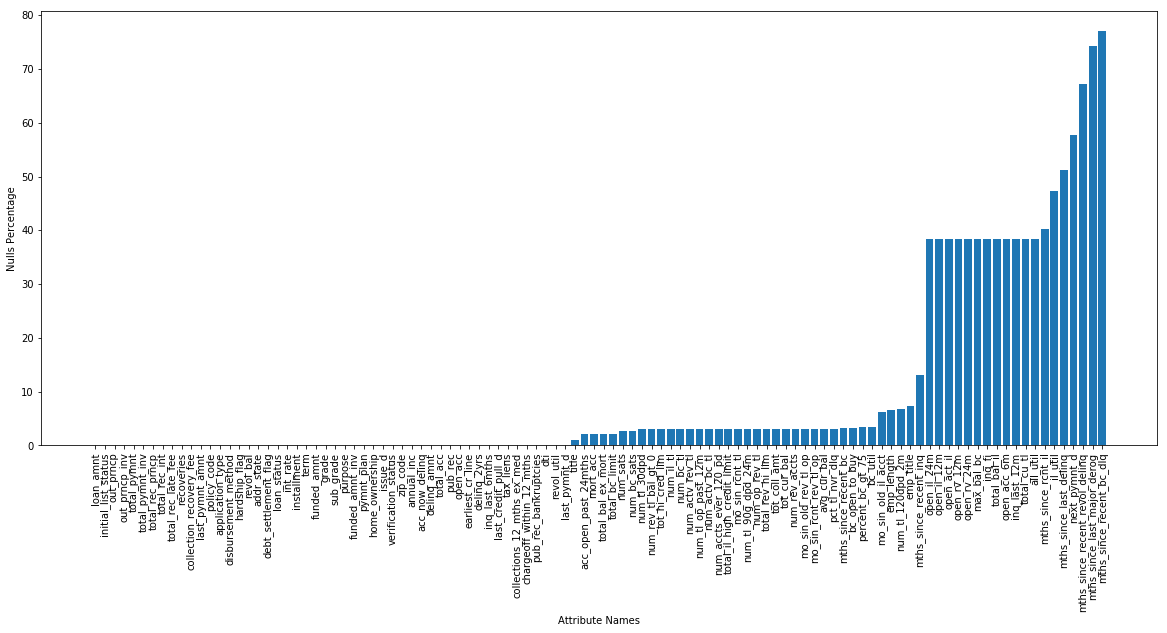

In [14]:
##### Plot how the Null percentage is distributed for columns

%matplotlib inline 
plt.figure(figsize=(20,8))
plt.bar(Upd_loan_Attr_Null_Perctage.index, Upd_loan_Attr_Null_Perctage.values)
plt.xlabel('Attribute Names')
plt.xticks(rotation=90)
plt.ylabel('Nulls Percentage')


From the graph above we see that there are many columns with NULL values. So will need to identify is it good to keep those columns or discard!


In [15]:
Upd_loan_Attr_Null_Perctage.shape

(106,)

**Identify the top 45 attributes where there is no NULL data, so that those attributes can be used for analysis**

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [0]:
Test_Upd_loan = Upd_loan[(Upd_loan['last_pymnt_d'].notnull()) & ( (Upd_loan['loan_status']!='Charged Off') | (Upd_loan['loan_status']!='Fully Paid'))]


In [18]:
#Check the counts for ' Fully Paid' and 'Charged Off' loan-status respective categories.

Test_Upd_loan['loan_status'].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             259395
Late (31-120 days)                                       21744
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        749
Default                                                     30
Name: loan_status, dtype: int64

In [0]:
valueCOunts = pd.DataFrame(Test_Upd_loan['loan_status'].value_counts())



In [0]:
valueCOunts = pd.DataFrame(Test_Upd_loan['loan_status'].value_counts())
valueCOunts = valueCOunts.reset_index()


In [21]:

valueCOunts.head()

,index,loan_status
0,Fully Paid,1041952
1,Current,919695
2,Charged Off,259395
3,Late (31-120 days),21744
4,In Grace Period,8952


Text(0, 0.5, 'Number of Customers per Loan Status')

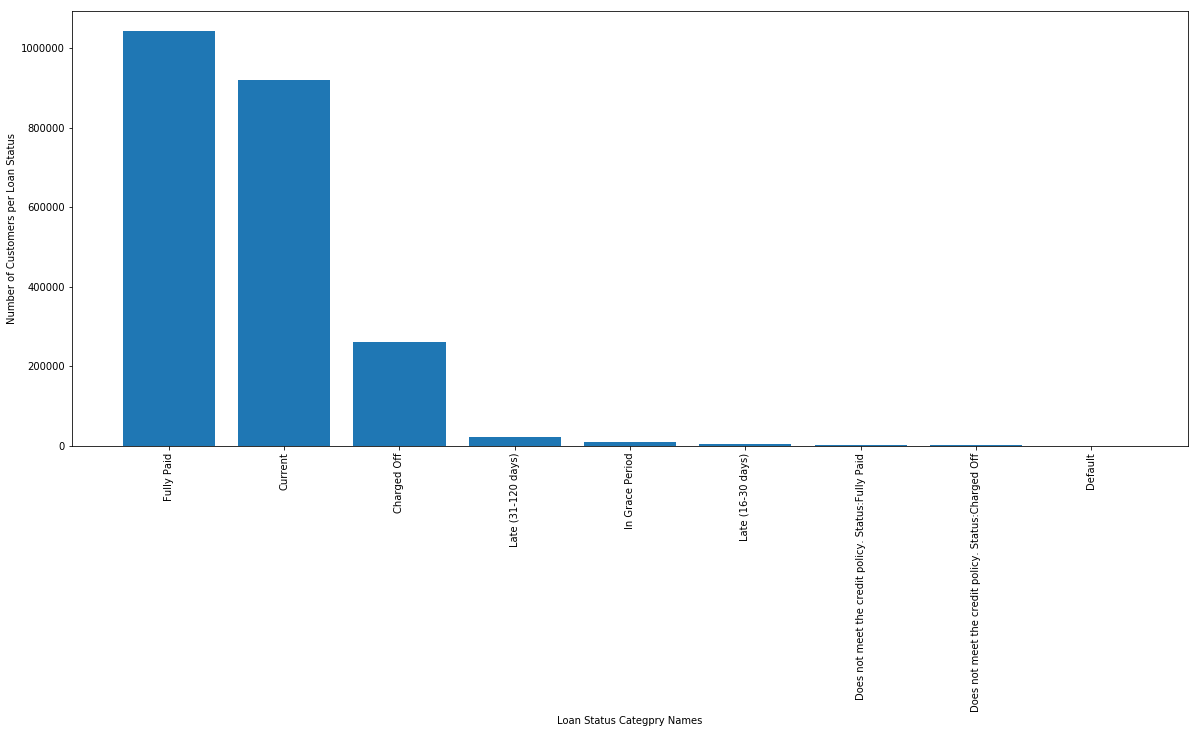

In [22]:
%matplotlib inline 
plt.figure(figsize=(20,8))
plt.bar(valueCOunts['index'], valueCOunts.loan_status)
plt.xlabel('Loan Status Categpry Names')
plt.xticks(rotation=90)
plt.ylabel('Number of Customers per Loan Status')

In [0]:
Test_Upd_loan = Upd_loan[(Upd_loan['revol_util'].notnull()) & ( (Upd_loan['loan_status']!='Charged Off') | (Upd_loan['loan_status']!='Fully Paid'))]


In [0]:
Test_Upd_loan = Upd_loan[(Upd_loan['last_credit_pull_d'].notnull()) & ( (Upd_loan['loan_status']!='Charged Off') | (Upd_loan['loan_status']!='Fully Paid'))]


In [0]:
Test_Upd_loan = Upd_loan[(Upd_loan['inq_last_6mths'].notnull()) & ( (Upd_loan['loan_status']!='Charged Off') | (Upd_loan['loan_status']!='Fully Paid'))]


In [0]:
Test_Upd_loan = Upd_loan[(Upd_loan['delinq_2yrs'].notnull()) & ( (Upd_loan['loan_status']!='Charged Off') | (Upd_loan['loan_status']!='Fully Paid'))]


In [0]:
Test_Upd_loan = Upd_loan[(Upd_loan['earliest_cr_line'].notnull()) & ( (Upd_loan['loan_status']!='Charged Off') | (Upd_loan['loan_status']!='Fully Paid'))]


In [0]:
Test_Upd_loan = Upd_loan[(Upd_loan['open_acc'].notnull()) & ( (Upd_loan['loan_status']!='Charged Off') | (Upd_loan['loan_status']!='Fully Paid'))]


In [0]:
Test_Upd_loan = Upd_loan[(Upd_loan['pub_rec'].notnull()) & ( (Upd_loan['loan_status']!='Charged Off') | (Upd_loan['loan_status']!='Fully Paid'))]


In [0]:
Test_Upd_loan = Upd_loan[(Upd_loan['total_acc'].notnull()) & ( (Upd_loan['loan_status']!='Charged Off') | (Upd_loan['loan_status']!='Fully Paid'))]


In [0]:
Test_Upd_loan = Upd_loan[(Upd_loan['zip_code'].notnull())] # & ( (Upd_loan['loan_status']!='Charged Off') | (Upd_loan['loan_status']!='Fully Paid'))]


In [32]:
# the counts of 'fully paid' and chargeoff were good enough at this stage. Hence, filtering the nulls.

Test_Upd_loan = Upd_loan[(Upd_loan['dti'].notnull())] # & ( (Upd_loan['loan_status']!='Charged Off') | (Upd_loan['loan_status']!='Fully Paid'))]
Test_Upd_loan['loan_status'].value_counts()


Fully Paid                                             1041702
Current                                                 918338
Charged Off                                             261593
Late (31-120 days)                                       21869
In Grace Period                                           8946
Late (16-30 days)                                         3729
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [0]:
Test_Upd_loan = Test_Upd_loan[Test_Upd_loan['collections_12_mths_ex_med'].notnull()]

In [0]:
Test_Upd_loan = Test_Upd_loan[Test_Upd_loan['tax_liens'].notnull()]

In [0]:
Test_Upd_loan = Test_Upd_loan[Test_Upd_loan['delinq_amnt'].notnull()]

In [0]:
Test_Upd_loan = Test_Upd_loan[Test_Upd_loan['acc_now_delinq'].notnull()]

In [0]:
Test_Upd_loan = Test_Upd_loan[Test_Upd_loan['annual_inc'].notnull()]

In [0]:
# emp_length is removing good amount of data from the dataset. Around 200K

Test_Upd_loan = Test_Upd_loan[Test_Upd_loan['emp_length'].notnull()]

In [39]:
Test_Upd_loan['loan_status'].value_counts()

Fully Paid                                             986830
Current                                                851120
Charged Off                                            241253
Late (31-120 days)                                      19962
In Grace Period                                          8378
Late (16-30 days)                                        3306
Does not meet the credit policy. Status:Fully Paid       1902
Does not meet the credit policy. Status:Charged Off       724
Default                                                    28
Name: loan_status, dtype: int64

In [0]:
#capture percentage

chk_Test_Upd_loan = (100*(Test_Upd_loan.isnull().sum()/len(Test_Upd_loan.index))).sort_values()


In [41]:
# Top 45 Columns which are having no null values

chk_Test_Upd_loan.index[:45]

Index(['loan_amnt', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'pub_rec', 'recoveries', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'disbursement_method', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'hardship_flag', 'collection_recovery_fee', 'open_acc', 'debt_settlement_flag', 'loan_status',
       'installment', 'emp_length', 'funded_amnt', 'home_ownership', 'funded_amnt_inv', 'annual_inc', 'verification_status', 'issue_d', 'grade', 'sub_grade', 'purpose', 'int_rate', 'addr_state', 'dti', 'delinq_2yrs', 'term', 'earliest_cr_line', 'pymnt_plan'],
      dtype='object')

In [0]:
Final_Test_Upd_loan = Test_Upd_loan[chk_Test_Upd_loan.index[:45]]

In [0]:
# Checking the percentage again

# summarise number of missing values again
Final_Test_Upd_loan_Attr_Null_Perctage = (100*(Final_Test_Upd_loan.isnull().sum()/len(Final_Test_Upd_loan.index))).sort_values()


Text(0, 0.5, 'Nulls Percentage')

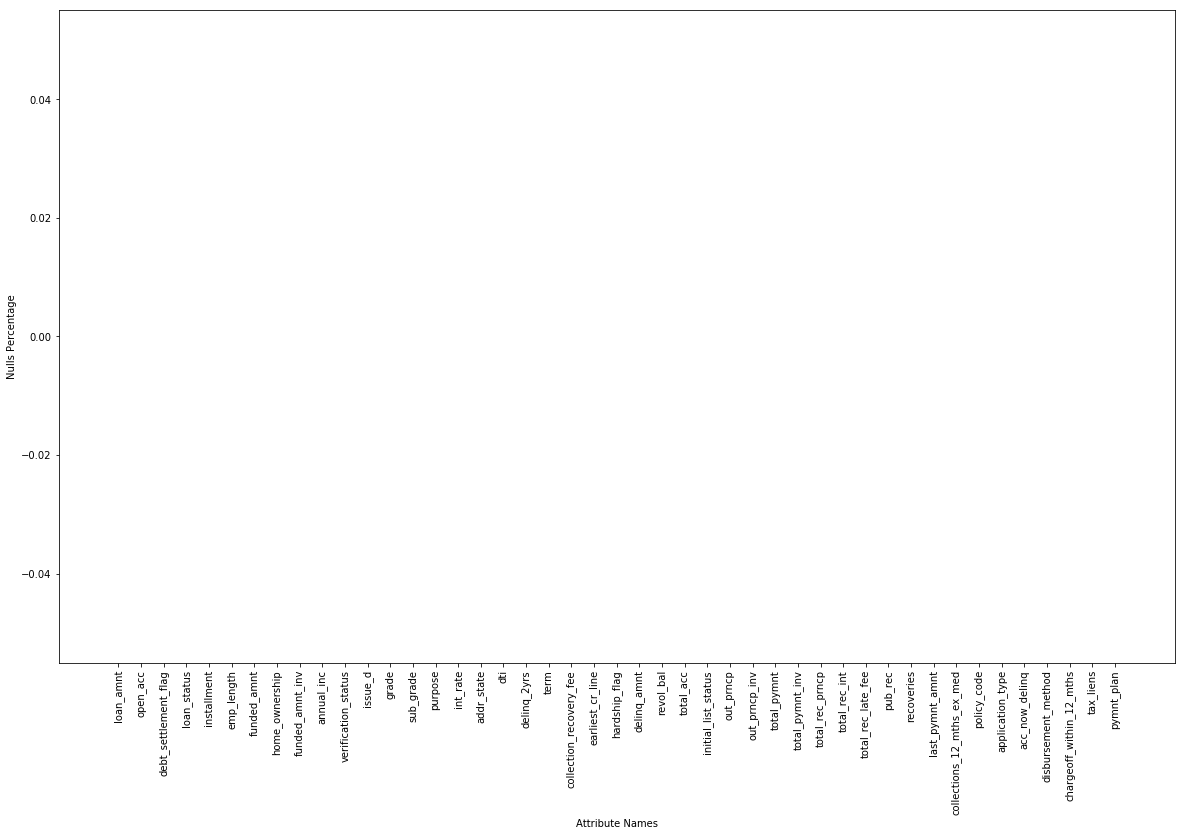

In [44]:
##### Plot how the Null percentage is distributed for columns

%matplotlib inline 
plt.figure(figsize=(20,12))
plt.bar(Final_Test_Upd_loan_Attr_Null_Perctage.index, Final_Test_Upd_loan_Attr_Null_Perctage.values)
plt.xlabel('Attribute Names')
plt.xticks(rotation=90)
plt.ylabel('Nulls Percentage')

In [45]:
Final_Test_Upd_loan.shape

(2113503, 45)

In [46]:
# Final set of Columns 
Final_Test_Upd_loan.columns

Index(['loan_amnt', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'pub_rec', 'recoveries', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'disbursement_method', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'hardship_flag', 'collection_recovery_fee', 'open_acc', 'debt_settlement_flag', 'loan_status',
       'installment', 'emp_length', 'funded_amnt', 'home_ownership', 'funded_amnt_inv', 'annual_inc', 'verification_status', 'issue_d', 'grade', 'sub_grade', 'purpose', 'int_rate', 'addr_state', 'dti', 'delinq_2yrs', 'term', 'earliest_cr_line', 'pymnt_plan'],
      dtype='object')

As per the given data, we can see that there are majorly 3 different types of variables present.

1. Applicant Centric (occupation, age etc)
2. Loan Centric (Interest, term etc)
3. Applicant Behaviour over loan term Centric (deliquent status, next payment date etc)



Lets identify the columns which are generated after the loan is approved. This is helpful because those variables are not usually available at the time of loan applicaiton. So, considering them for the purpose of analysis is not required.

In [0]:
# Some behavioural attributes are;

Applicant_behaviour_var_set =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]

In [48]:
len(Applicant_behaviour_var_set)

14

In [49]:
Final_Test_Upd_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113503 entries, 0 to 2260667
Data columns (total 45 columns):
loan_amnt                     int64
revol_bal                     int64
total_acc                     float64
initial_list_status           object
out_prncp                     float64
out_prncp_inv                 float64
total_pymnt                   float64
total_pymnt_inv               float64
total_rec_prncp               float64
total_rec_int                 float64
total_rec_late_fee            float64
pub_rec                       float64
recoveries                    float64
last_pymnt_amnt               float64
collections_12_mths_ex_med    float64
policy_code                   int64
application_type              object
acc_now_delinq                float64
disbursement_method           object
chargeoff_within_12_mths      float64
delinq_amnt                   float64
tax_liens                     float64
hardship_flag                 object
collection_recovery_fee

Now check the target variable "Loan Status".

We see that we have differnet status available in the data.

Fully Paid means good, so will relabel them as "1"
Charged Off mean default so will relabel them as "0"
The rest of the status will not consider.

In [50]:
Final_Test_Upd_loan['loan_status'].value_counts()

Fully Paid                                             986830
Current                                                851120
Charged Off                                            241253
Late (31-120 days)                                      19962
In Grace Period                                          8378
Late (16-30 days)                                        3306
Does not meet the credit policy. Status:Fully Paid       1902
Does not meet the credit policy. Status:Charged Off       724
Default                                                    28
Name: loan_status, dtype: int64

In [0]:
# filtering only fully paid or charged-off
Analysis_Final_Test_Upd_loan = Final_Test_Upd_loan[(Final_Test_Upd_loan['loan_status'] == 'Charged Off') | (Final_Test_Upd_loan['loan_status'] == 'Fully Paid')]


In [52]:
Analysis_Final_Test_Upd_loan['loan_status'].value_counts()

Fully Paid     986830
Charged Off    241253
Name: loan_status, dtype: int64

In [53]:
# Relabel, 'Fully Paid' =1  and   'Charged off' = 0

Analysis_Final_Test_Upd_loan['loan_status'] = Analysis_Final_Test_Upd_loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
Analysis_Final_Test_Upd_loan['loan_status'] = Analysis_Final_Test_Upd_loan['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
Analysis_Final_Test_Upd_loan['loan_status'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0    986830
1    241253
Name: loan_status, dtype: int64

In [54]:
Analysis_Final_Test_Upd_loan['loan_status'].unique()

array([0, 1])

In [55]:
Analysis_Final_Test_Upd_loan['loan_status_ohe'] = Analysis_Final_Test_Upd_loan['loan_status'].apply(lambda x: [1,0] if x==0 else [0,1])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**In this section, we will look at some categorical attributes and their impact on the Loan-status.**

In [56]:
# First, let's look at the overall default rate.

round(np.mean(Analysis_Final_Test_Upd_loan['loan_status']), 3)

0.196

In [0]:
defaultPercentage=round(np.mean(Analysis_Final_Test_Upd_loan['loan_status']), 3)
Non_defaultPercentage = 1-(defaultPercentage)


def_df = pd.DataFrame({'type': ['Default Percentage','Non Default Percentage'],
              'percentage': [defaultPercentage,Non_defaultPercentage]
             })



Text(0, 0.5, 'Default Percentage')

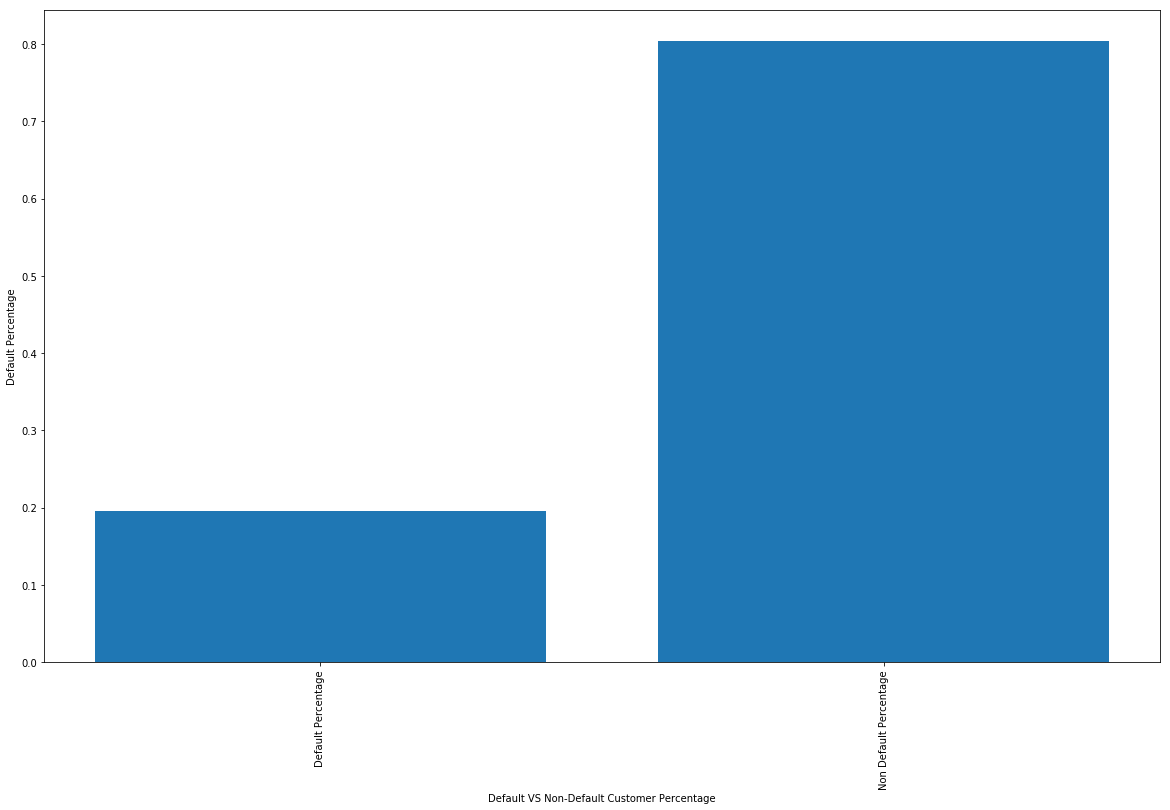

In [58]:
# Plot default and non defult percentage

%matplotlib inline 
plt.figure(figsize=(20,12))
plt.bar(def_df['type'], def_df['percentage'])
plt.xlabel('Default VS Non-Default Customer Percentage')
plt.xticks(rotation=90)
plt.ylabel('Default Percentage')

In [0]:
from datetime import datetime
test_dff = Analysis_Final_Test_Upd_loan

m_y =  [ (i.split("-")) for i in test_dff['issue_d']]

test_dff = m_y

month = pd.DataFrame(test_dff)[0]
year =  pd.DataFrame(test_dff)[1]



year = pd.DataFrame((year.value_counts()))
year = year.reset_index()
year.columns=['index','count']
year = year.sort_values(by=['index'])

month = pd.DataFrame((month.value_counts()))
month = month.reset_index()
month.columns=['index','count']
month = month.sort_values(by=['index'])

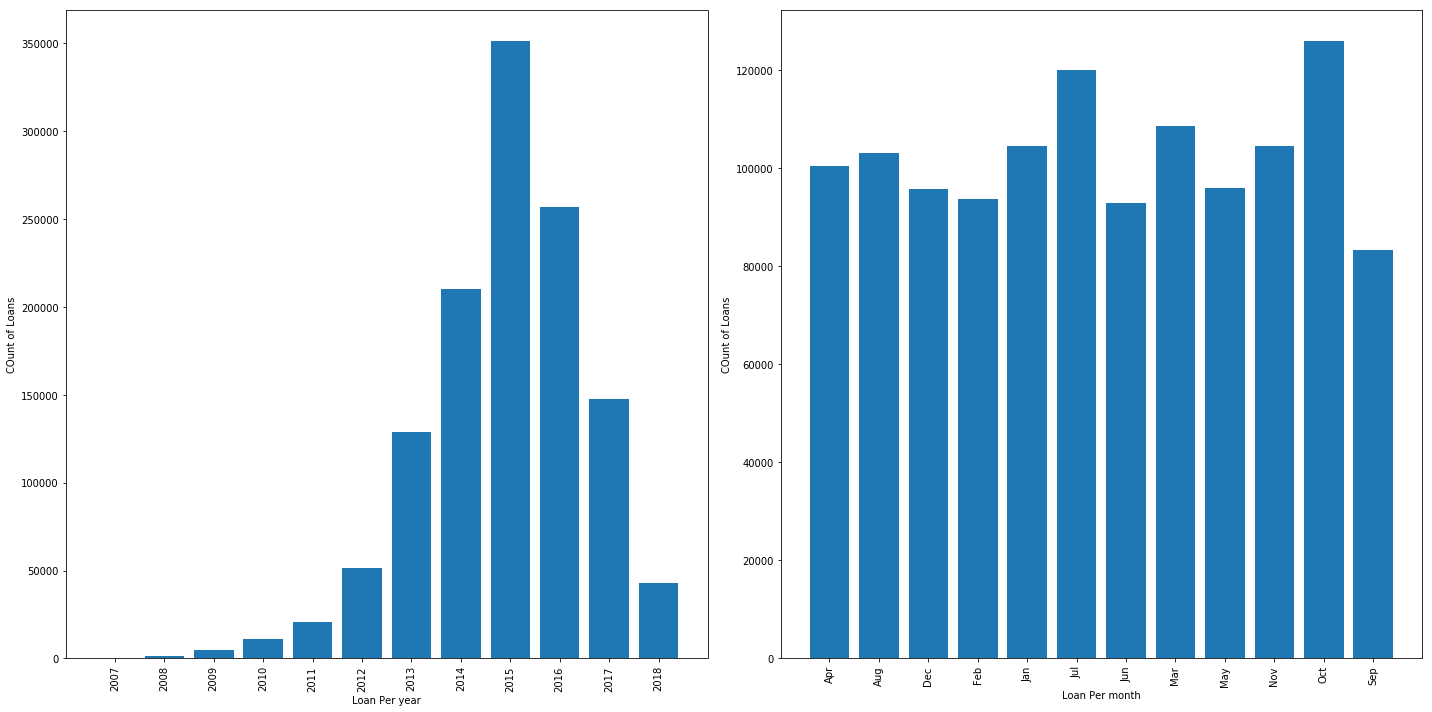

In [60]:
# Plot Loans provisioned per year.
%matplotlib inline 
  
def yr_month(inp, text):
  plt.bar(inp['index'], inp['count'])
  var = "Loan Per "+ text
  plt.xlabel(var)
  plt.xticks(rotation=90)
  plt.ylabel('COunt of Loans')
  

fig = plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
yr_month(year,'year')

plt.subplot(1, 2, 2)
yr_month(month,'month')

fig.tight_layout()
plt.show()




## Plotting the default rate across the categorical variable

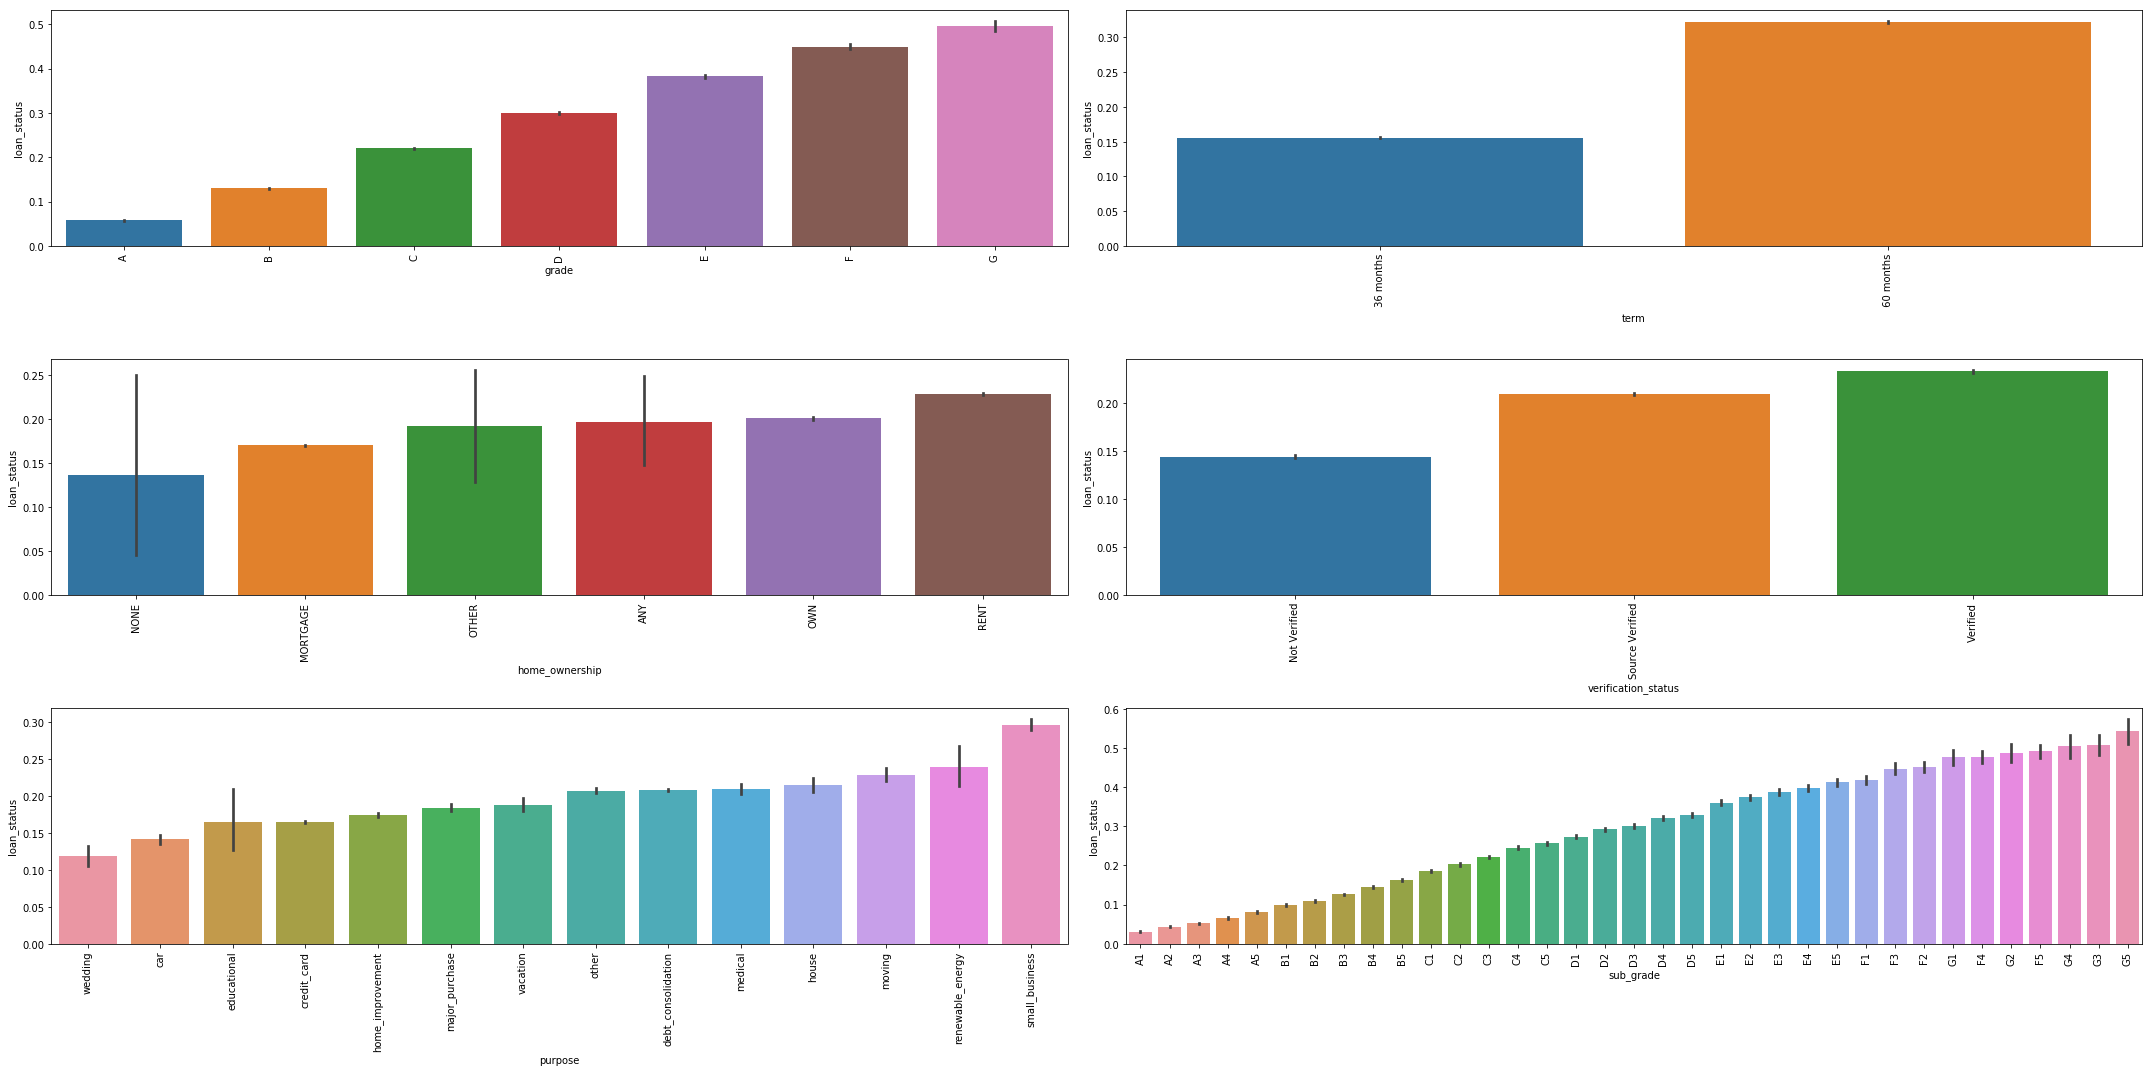

In [61]:
def pltcat(cat_var):
    result = Analysis_Final_Test_Upd_loan.groupby([cat_var])['loan_status'].aggregate(np.mean).reset_index().sort_values('loan_status')
    g = sns.barplot(x=cat_var, y="loan_status", data=Analysis_Final_Test_Upd_loan, order=result[cat_var])
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    
fig = plt.figure(figsize=(30,15))

plt.subplot(3, 2, 1)
pltcat('grade')
                                                                                            
plt.subplot(3, 2, 2)
pltcat('term')

plt.subplot(3, 2, 3)
pltcat('home_ownership')

plt.subplot(3, 2, 4)
pltcat('verification_status')

plt.subplot(3, 2, 5)
pltcat('purpose')

plt.subplot(3, 2, 6)
pltcat('sub_grade')

fig.tight_layout()
plt.show()

**Based on the above graphs we can see that;**

**grade:** As the grade of loan goes from A to G, the default rate increases. The Grade is defined by the lender and it reflects the risk associated with the loan

**term:** 60 months loans default more than 36 months loans

**sub-grade:** as expected - A1 is better than A2 better than A3 and so on 

**home ownership:** not a great discriminator

**verification_status:** surprisingly, verified loans default more than not verified

**purpose:** small business loans defualt the most, then renewable energy and education


## Let's now compare the default rates across two types of categorical variables

In the upcoming analyses, we will segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate.

In [62]:
# Check the top 3 'purpose' category for the loan
# "debt_consolidation"  , "credit_card"  , "home_improvement" are the top 3

Analysis_Final_Test_Upd_loan['purpose'].value_counts()

debt_consolidation    716417
credit_card           268514
home_improvement       78487
other                  69554
major_purchase         26749
small_business         14579
medical                13769
car                    13359
moving                  8605
vacation                8062
house                   6556
wedding                 2261
renewable_energy         856
educational              315
Name: purpose, dtype: int64

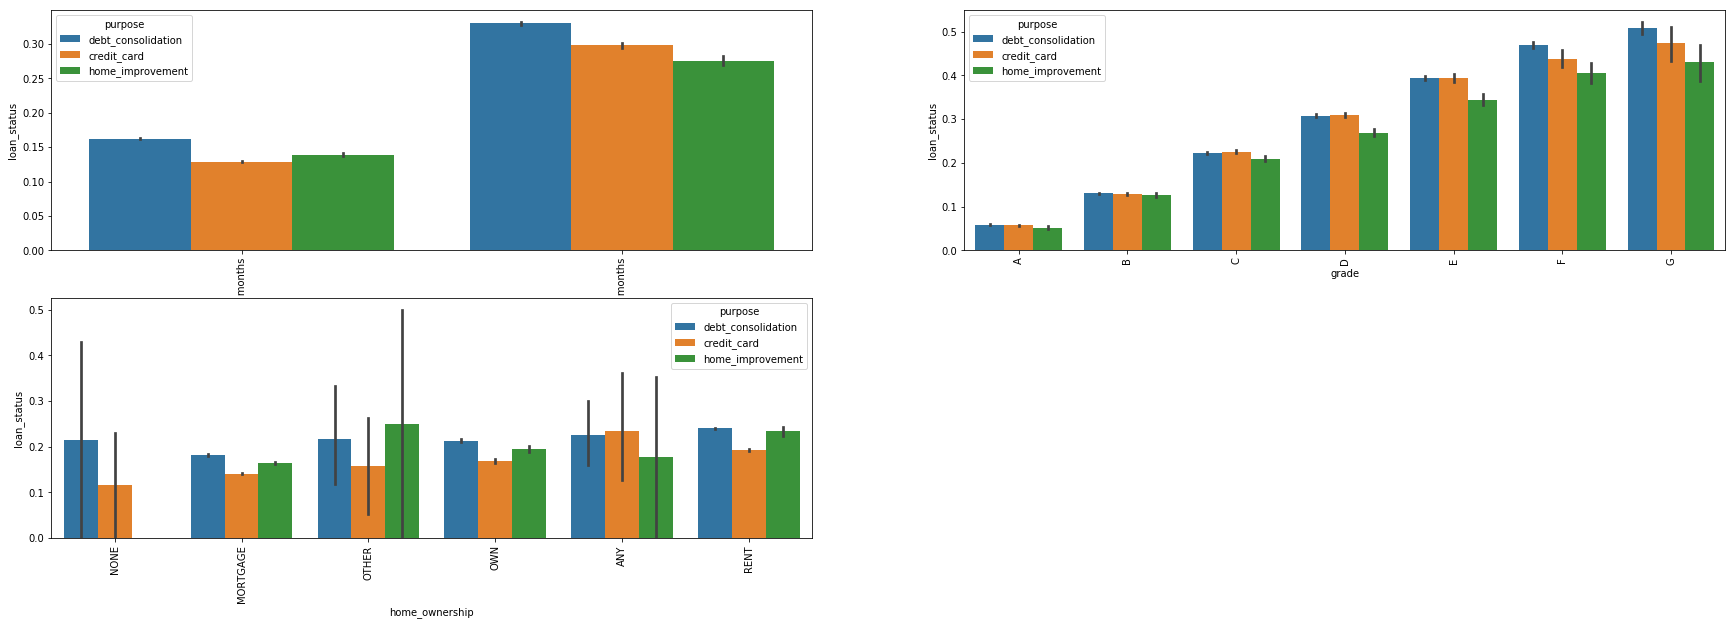

In [63]:
# lets write a function which takes a categorical variable and plots the default rate segmented by purpose 

def plotsegment(cat_var):
    
    df= (Analysis_Final_Test_Upd_loan[Analysis_Final_Test_Upd_loan['purpose'].isin(list((Analysis_Final_Test_Upd_loan['purpose'].value_counts()).index[:3]))])
    result = df.groupby([cat_var])['loan_status'].aggregate(np.mean).reset_index().sort_values('loan_status')    

    g = sns.barplot(x=cat_var, y="loan_status", hue=df['purpose'], data=df, order=result[cat_var])
    g.set_xticklabels(g.get_xticklabels(), rotation=90)    

plt.figure(figsize=(30, 15))

plt.subplot(3, 2, 1)  
plotsegment('term')

plt.subplot(3, 2, 2)
plotsegment('grade')

plt.subplot(3, 2, 3)
plotsegment('home_ownership')

fig.tight_layout()
plt.show()

** From the above 3 categorical variable analysis we find that "debt_consolidation" has the highest default rates**

## In this section we will try to explore how the default rate is varying across different categorical variables

** Find all the Categorical variables in the dataset **

In [0]:
Analysis_Final_Test_Upd_loan_categorical = Analysis_Final_Test_Upd_loan.loc[:, Analysis_Final_Test_Upd_loan.dtypes == object]

In [65]:
Analysis_Final_Test_Upd_loan_categorical.columns

Index(['initial_list_status', 'application_type', 'disbursement_method', 'hardship_flag', 'debt_settlement_flag', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'grade', 'sub_grade', 'purpose', 'addr_state', 'term', 'earliest_cr_line', 'pymnt_plan', 'loan_status_ohe'], dtype='object')

In [66]:
# Add the target variable "loan_status" to the datframe 

Analysis_Final_Test_Upd_loan_categorical['loan_status'] = Analysis_Final_Test_Upd_loan['loan_status']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


{'initial_list_status': 1.0, 'application_type': 4.0, 'disbursement_method': 1.0, 'hardship_flag': 80.0, 'debt_settlement_flag': 82.0, 'emp_length': 2.0, 'home_ownership': 9.0, 'verification_status': 9.0, 'issue_d': 26.0, 'grade': 44.0, 'sub_grade': 51.0, 'purpose': 18.0, 'addr_state': 13.0, 'term': 17.0, 'earliest_cr_line': 100.0, 'pymnt_plan': 0.0}


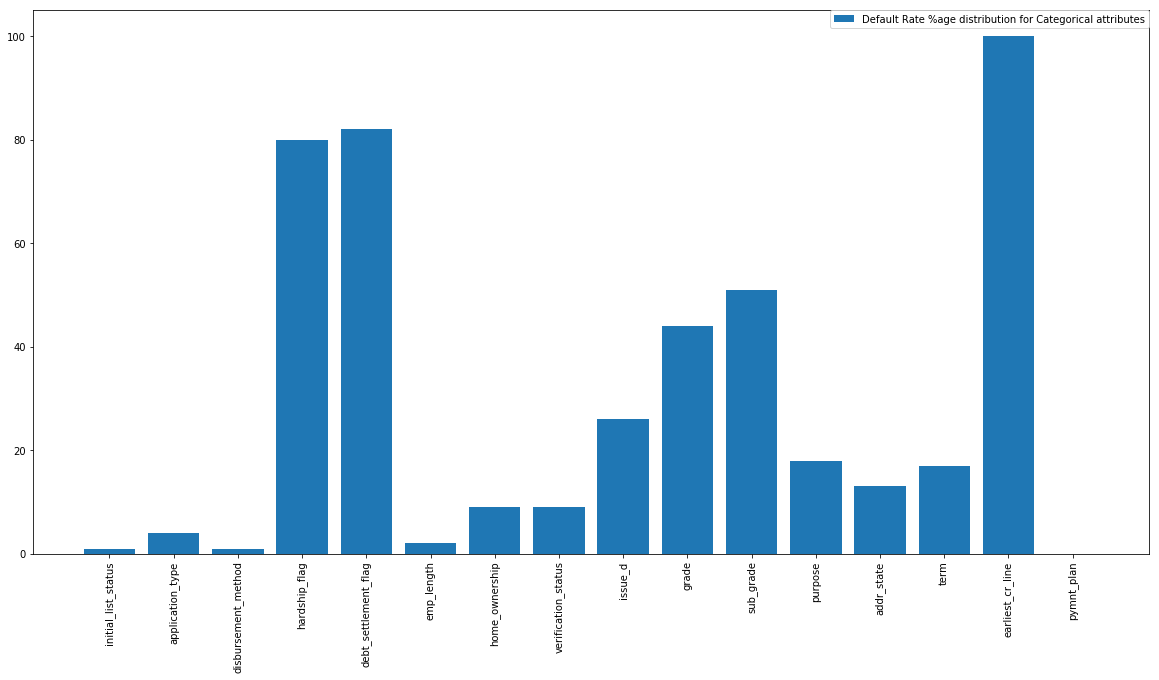

In [67]:
# Function which will create a default-rate for each categorical variable

def diff_rate(cat_var):
    default_rates = Analysis_Final_Test_Upd_loan_categorical.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

d={}
for key in Analysis_Final_Test_Upd_loan_categorical.columns:
    if (key not in ('loan_status','loan_status_ohe')):
        d[key] = diff_rate(key)[1]*100
        

print(d)

keys = d.keys()
vals = d.values()

plt.figure(figsize=(20, 10))
plt.bar(keys, vals, label="Default Rate %age distribution for Categorical attributes")
plt.xticks(list(keys), rotation=90)
plt.legend (bbox_to_anchor=(1, 1), loc="upper right", borderaxespad=0.)
fig.tight_layout()
plt.show()

## ML Modelling

In [72]:
Analysis_Final_Test_Upd_loan.shape

(1228083, 46)

In [0]:
Analysis_Final_Test_Upd_loan.to_pickle("./Analysis_Final_Test_Upd_loan.pkl")

In [71]:
from google.colab import files
files.download('Analysis_Final_Test_Upd_loan.pkl') 

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 42690, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

** Load the Pickled dat **

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Analysis_Final_Test_Upd_loan.pkl to Analysis_Final_Test_Upd_loan (2).pkl


In [0]:
import pandas
Analysis_Final_Test_Upd_loan = pandas.read_pickle("./Analysis_Final_Test_Upd_loan.pkl")

In [6]:
Analysis_Final_Test_Upd_loan.shape

(1228083, 46)

** Reloading from the pickle completed **

In [0]:
def convert(inp):
    uniques = sorted(list(set(inp)))
    return [uniques.index(x) + 1 for x in inp]

** Create a Final Dataset for Modelling **

In [0]:
# resetting, so that the INDEX remain same
Analysis_Final_Test_Upd_loan = Analysis_Final_Test_Upd_loan.reset_index()

In [0]:
# Integer attributes

df_Int_Values = Analysis_Final_Test_Upd_loan.loc[:, Analysis_Final_Test_Upd_loan.dtypes != object]
df_Int_Values = df_Int_Values.set_index('index')

** From the Categorical set, let's consider only the attributes which have more impact on the Default. ANd, then compare them into Integers so that the data can be passed to the Model **

In [0]:
df_Cat_Values=pd.DataFrame()

df_Cat_Values['index'] = Analysis_Final_Test_Upd_loan['index']
df_Cat_Values['loan_status_ohe'] = Analysis_Final_Test_Upd_loan['loan_status_ohe']


In [0]:
df_Cat_Values['grade'] = convert(Analysis_Final_Test_Upd_loan['grade'])
df_Cat_Values['sub_grade'] = convert(Analysis_Final_Test_Upd_loan['sub_grade'])
df_Cat_Values['debt_settlement_flag'] = convert(Analysis_Final_Test_Upd_loan['debt_settlement_flag'])
df_Cat_Values['hardship_flag'] = convert(Analysis_Final_Test_Upd_loan['hardship_flag'])
df_Cat_Values['term'] = convert(Analysis_Final_Test_Upd_loan['term'])
df_Cat_Values['earliest_cr_line'] = convert(Analysis_Final_Test_Upd_loan['earliest_cr_line'])

In [0]:
df_Cat_Values = df_Cat_Values.set_index('index')

In [15]:
df_Cat_Values.head(2)

,loan_status_ohe,grade,sub_grade,debt_settlement_flag,hardship_flag,term,earliest_cr_line
index,,,,,,,
100,"[1, 0]",4,20,1,1,1,300
152,"[1, 0]",3,14,1,1,2,417


In [16]:
df_Int_Values.head(2)

,loan_amnt,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,...,collection_recovery_fee,open_acc,loan_status,installment,funded_amnt,funded_amnt_inv,annual_inc,int_rate,dti,delinq_2yrs
index,,,,,,,,,,,,,,,,,,,,,
100,30000,15603,19.0,0.0,0.0,30026.44250,30026.44,30000.0,26.44,0.0,...,0.0,11.0,0,1151.16,30000,30000.0,100000.0,22.35,30.46,0.0
152,40000,34971,37.0,0.0,0.0,40856.67896,40856.68,40000.0,856.68,0.0,...,0.0,18.0,0,975.71,40000,40000.0,45000.0,16.14,50.53,0.0


# One Hot Encoding #

In [17]:
df_Cat_Values.columns

Index(['loan_status_ohe', 'grade', 'sub_grade', 'debt_settlement_flag',
       'hardship_flag', 'term', 'earliest_cr_line'],
      dtype='object')

In [18]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(sparse=False)
cols_to_encode = ['grade', 'sub_grade', 'debt_settlement_flag', 'hardship_flag', 'term']    #, 'earliest_cr_line'  because of Memory issues, keeping this attribute on the side

le = preprocessing.LabelEncoder()
X = df_Cat_Values[cols_to_encode]
X_2 = X.apply(le.fit_transform)
enc = preprocessing.OneHotEncoder()
enc.fit(X_2)
df_Cat_Values_train_features = enc.transform(X_2).toarray()

print("train_features.shape:", df_Cat_Values_train_features.shape)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


train_features.shape: (1228083, 48)


In [19]:
df_Cat_Values_train_features.shape

(1228083, 48)

In [20]:
df_Int_Values.shape

(1228083, 29)

In [0]:
df_Cat_Values_train_features_pd = pd.DataFrame(df_Cat_Values_train_features)

In [0]:
df_Cat_Values_train_features_pd['index'] = df_Int_Values.index

In [0]:
df_Cat_Values_train_features_pd = df_Cat_Values_train_features_pd.set_index('index')

In [24]:
df_Cat_Values_train_features_pd.head(2)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
index,,,,,,,,,,,,,,,,,,,,,
100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
152,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [25]:
df_Int_Values.head(2)

,loan_amnt,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,...,collection_recovery_fee,open_acc,loan_status,installment,funded_amnt,funded_amnt_inv,annual_inc,int_rate,dti,delinq_2yrs
index,,,,,,,,,,,,,,,,,,,,,
100,30000,15603,19.0,0.0,0.0,30026.44250,30026.44,30000.0,26.44,0.0,...,0.0,11.0,0,1151.16,30000,30000.0,100000.0,22.35,30.46,0.0
152,40000,34971,37.0,0.0,0.0,40856.67896,40856.68,40000.0,856.68,0.0,...,0.0,18.0,0,975.71,40000,40000.0,45000.0,16.14,50.53,0.0


In [0]:
df = pd.concat([df_Int_Values,df_Cat_Values_train_features_pd],axis=1)

In [27]:
df.head(2)

,loan_amnt,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,...,38,39,40,41,42,43,44,45,46,47
index,,,,,,,,,,,,,,,,,,,,,
100,30000,15603,19.0,0.0,0.0,30026.44250,30026.44,30000.0,26.44,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
152,40000,34971,37.0,0.0,0.0,40856.67896,40856.68,40000.0,856.68,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [0]:
df['loan_status_ohe'] = df_Cat_Values['loan_status_ohe']

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import math

In [0]:
data = df

In [31]:
data.shape

(1228083, 78)

In [32]:
inputArray = []
outputArray = []

outputArray = np.array(data['loan_status_ohe'])
inputArray  = np.array(data.drop(['loan_status','loan_status_ohe'],axis=1))

print(len(inputArray))
print(len(outputArray))

1228083
1228083


In [33]:
import random as rn
import numpy as np

def normalizeInput(inputs):
  inputs = np.transpose(inputs)
  maxes = []
  for row in inputs:
    maxes.append(np.max(row))
  inputs = np.transpose(inputs)
  for i in range(len(inputs)):
    for j in range(len(inputs[i])):
      inputs[i][j] /= maxes[j]
  inputs[np.isnan(inputs)]=0
  return inputs
  
inputArray = normalizeInput(inputArray)
#testX = inputArray[int(len(inputArray)*.9):len(inputArray)]
#testY = outputArray[int(len(outputArray)*.9):len(outputArray)]
testX = inputArray[0:int(len(inputArray)*0.1)]
testY = outputArray[0:int(len(outputArray)*0.1)]

print(testY[0])
print(len(testX))
print(len(testY))

#inputArray = inputArray[0:int(len(inputArray)*.9)]
#outputArray = outputArray[0:int(len(inputArray)*.9)]
inputArray = inputArray[int(len(inputArray)*0.1):len(inputArray)]
outputArray = outputArray[int(len(outputArray)*0.1):len(outputArray)]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


[1, 0]
122808
122808


In [34]:
yesInput = []
yesOutput = []
noInput = []
noOutput = []

for i in range(len(outputArray)):
  if outputArray[i] == [1, 0]:
    yesInput.append(inputArray[i])
    yesOutput.append(outputArray[i])
  else:
    noInput.append(inputArray[i])
    noOutput.append(outputArray[i])

def getBatch(batchSize):
  xBatch, yBatch = [], []
  
  for i in range(batchSize//2):
    index = rn.randrange(len(yesInput))
    xBatch.append(yesInput[index])
    yBatch.append(yesOutput[index])
    
  for i in range(batchSize//2):
    index = rn.randrange(len(noInput))
    xBatch.append(noInput[index])
    yBatch.append(noOutput[index])
  
  return xBatch, yBatch

def truncate(n, decimals=0):
  multiplier = 10 ** decimals
  return int(n * multiplier) / multiplier

print("Num yes: {}".format(len(yesInput)))
print("Num no: {}".format(len(noInput)))
# 87% yes
# 13% no

Num yes: 890437
Num no: 214838


** GRAPH**

In [0]:
# Network and Training
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:

tf.reset_default_graph()

In [0]:


####################################
LEARNING_RATE = 0.0001
BATCH_SIZE = 128
EPOCHS = 100

DROPOUT_RATE = 0.0
INPUT_NODES = (data.shape[1] - 2)
HIDDEN_NODES = 1024
OUTPUT_NODES = 2
####################################


In [0]:

FILENAME = "Checkpoint"

tf.reset_default_graph()
#initializer = tf.contrib.layers.xavier_initializer()
#initializer = tf.keras.initializers.he_uniform()
initializer = tf.keras.initializers.he_normal()
#initializer = tf.contrib.layers.variance_scaling_initializer()

inputLayer = tf.placeholder(tf.float32, [None, INPUT_NODES], "inputLayer") 
outputLayer = tf.placeholder(tf.float32, [None, OUTPUT_NODES], "outputLayer")

firstWeight = tf.Variable(initializer([INPUT_NODES, HIDDEN_NODES]), "firstWeight")
firstBias = tf.Variable(initializer([HIDDEN_NODES]), "firstBias")
firstOutput = tf.matmul(inputLayer, firstWeight)
firstOutput = tf.add(firstOutput, firstBias)
firstOutput = tf.nn.tanh(firstOutput)

secondWeight = tf.Variable(initializer([HIDDEN_NODES, HIDDEN_NODES]), "secondWeight")
secondBias = tf.Variable(initializer([HIDDEN_NODES]), "secondBias")
secondOutput = tf.matmul(firstOutput, secondWeight)
secondOutput = tf.add(secondOutput, secondBias)
secondOutput = tf.nn.tanh(secondOutput)

thirdWeight = tf.Variable(initializer([HIDDEN_NODES, HIDDEN_NODES]), "thirdWeight")
thirdBias = tf.Variable(initializer([HIDDEN_NODES]), "secondBias")
thirdOutput = tf.matmul(secondOutput, thirdWeight)
thirdOutput = tf.add(thirdOutput, thirdBias)
thirdOutput = tf.nn.tanh(thirdOutput)

fourthWeight = tf.Variable(initializer([HIDDEN_NODES, HIDDEN_NODES]), "fourthWeight")
fourthBias = tf.Variable(initializer([HIDDEN_NODES]), "fourthBias")
fourthOutput = tf.matmul(thirdOutput, fourthWeight)
fourthOutput = tf.add(fourthOutput, fourthBias)
fourthOutput = tf.nn.tanh(fourthOutput)

fifthWeight = tf.Variable(initializer([HIDDEN_NODES, HIDDEN_NODES]), "fifthWeight")
fifthBias = tf.Variable(initializer([HIDDEN_NODES]), "fifthBias")
fifthOutput = tf.matmul(fourthOutput, fifthWeight)
fifthOutput = tf.add(fifthOutput, fifthBias)
fifthOutput = tf.nn.tanh(fifthOutput)

sixthWeight = tf.Variable(initializer([HIDDEN_NODES, OUTPUT_NODES]), "sixthWeight")
sixthBias = tf.Variable(initializer([OUTPUT_NODES]), "sixthBias")
sixthOutput = tf.matmul(fifthOutput, sixthWeight)
sixthOutput = tf.add(sixthOutput, sixthBias)

output = sixthOutput
argMaxOut = tf.argmax(output, 1)
softmaxOutput = tf.nn.softmax(output, axis=1)


In [0]:

crossEntropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = outputLayer, logits = output))
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE).minimize(crossEntropy)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=LEARNING_RATE).minimize(crossEntropy)
answers = tf.equal(tf.argmax(output, 1), tf.argmax(outputLayer, 1))
accuracy = tf.reduce_mean(tf.cast(answers, tf.float32))


Epoch: 0 Train Accuracy: 0.71 Test Accuracy 0.477 Train Loss: 0.7885 Test Loss: 1.08671
Epoch: 2 Train Accuracy: 0.664 Test Accuracy 0.814 Train Loss: 0.87536 Test Loss: 0.43113
Epoch: 4 Train Accuracy: 0.703 Test Accuracy 0.595 Train Loss: 0.48052 Test Loss: 0.7822
Epoch: 6 Train Accuracy: 0.804 Test Accuracy 0.849 Train Loss: 0.4722 Test Loss: 0.36032
Epoch: 8 Train Accuracy: 0.773 Test Accuracy 0.871 Train Loss: 0.47089 Test Loss: 0.30887
Epoch: 10 Train Accuracy: 0.851 Test Accuracy 0.733 Train Loss: 0.32971 Test Loss: 0.50358
Epoch: 12 Train Accuracy: 0.89 Test Accuracy 0.898 Train Loss: 0.35247 Test Loss: 0.25797
Epoch: 14 Train Accuracy: 0.804 Test Accuracy 0.94 Train Loss: 0.34108 Test Loss: 0.18215
Epoch: 16 Train Accuracy: 0.843 Test Accuracy 0.909 Train Loss: 0.30872 Test Loss: 0.2359
Epoch: 18 Train Accuracy: 0.953 Test Accuracy 0.899 Train Loss: 0.20063 Test Loss: 0.26146
Epoch: 20 Train Accuracy: 0.921 Test Accuracy 0.964 Train Loss: 0.21429 Test Loss: 0.16342
Epoch: 22 T

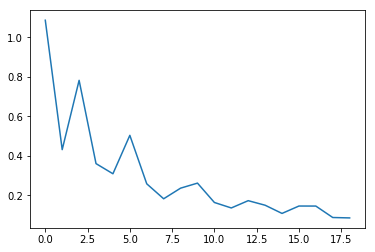

In [49]:
init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)

errors = []

for epoch in range(EPOCHS):
  xBatch, yBatch = getBatch(BATCH_SIZE)
  
  train_accuracy, train_cross_entropy, _ = session.run([accuracy, crossEntropy, optimizer], feed_dict={inputLayer: xBatch, outputLayer: yBatch})
  
  #print("train_cross_entropy:", train_cross_entropy)
  
  if epoch%2==0:
    test_accuracy, test_cross_entropy = session.run([accuracy, crossEntropy], feed_dict={inputLayer:list(testX), outputLayer: list(testY)})
    errors.append(test_cross_entropy)
    
    train_accuracy = session.run(accuracy, feed_dict={inputLayer:xBatch, outputLayer: yBatch})
    
    print("Epoch: {} Train Accuracy: {} Test Accuracy {} Train Loss: {} Test Loss: {}".format(epoch, truncate(train_accuracy, 3), truncate(test_accuracy, 3),\
                                                                                             truncate(train_cross_entropy, 5), truncate(test_cross_entropy, 5)))
  
    if test_accuracy >= 0.98 and train_accuracy >= 0.98:
      break


print("Final Accuracy: {}".format(test_accuracy))
    
file = open(FILENAME, "w+")
file.close()
saver = tf.train.Saver()
saver.save(session, "./" + FILENAME)

session.close()

plt.plot(errors)